In [4]:
from requests_html import AsyncHTMLSession
from bs4 import BeautifulSoup
from selenium import webdriver
from selenium.webdriver.chrome.options import Options
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import datetime as dt
import os
from IPython.display import clear_output, display
import time
from webdriver_manager.chrome import ChromeDriverManager

In [5]:
import http.client
http.client._MAXHEADERS = 1000

from requests_html import AsyncHTMLSession
asession = AsyncHTMLSession()

# 17) Fidelity Bank Ghana

In [6]:
DRIVER_PATH = r'C:\Users\user\Desktop\chromedriver.exe'
options = Options()
options.headless = True
options.add_argument("--window-size=1920,1200")

driver = webdriver.Chrome(options=options, executable_path=ChromeDriverManager().install())
driver.get("https://www.fidelitybank.com.gh")
response = driver.page_source
driver.quit()

soup = BeautifulSoup(response, 'lxml')
print(soup.prettify())



====== WebDriver manager ======
Current google-chrome version is 98.0.4758
Get LATEST chromedriver version for 98.0.4758 google-chrome
Trying to download new driver from https://chromedriver.storage.googleapis.com/98.0.4758.102/chromedriver_win32.zip
Driver has been saved in cache [C:\Users\user\.wdm\drivers\chromedriver\win32\98.0.4758.102]
C:\Users\user\AppData\Local\Temp/ipykernel_11560/3427902598.py:6: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome(options=options, executable_path=ChromeDriverManager().install())


<html class="com_content view-featured itemid-101 home j31 mm-hover no-touch" dir="ltr" lang="en-gb">
 <head>
  <link href="/apple-icon-57x57.png" rel="apple-touch-icon" sizes="57x57"/>
  <link href="/apple-icon-60x60.png" rel="apple-touch-icon" sizes="60x60"/>
  <link href="/apple-icon-72x72.png" rel="apple-touch-icon" sizes="72x72"/>
  <link href="/apple-icon-76x76.png" rel="apple-touch-icon" sizes="76x76"/>
  <link href="/apple-icon-114x114.png" rel="apple-touch-icon" sizes="114x114"/>
  <link href="/apple-icon-120x120.png" rel="apple-touch-icon" sizes="120x120"/>
  <link href="/apple-icon-144x144.png" rel="apple-touch-icon" sizes="144x144"/>
  <link href="/apple-icon-152x152.png" rel="apple-touch-icon" sizes="152x152"/>
  <link href="/apple-icon-180x180.png" rel="apple-touch-icon" sizes="180x180"/>
  <link href="/android-icon-192x192.png" rel="icon" sizes="192x192" type="image/png"/>
  <link href="/favicon-32x32.png" rel="icon" sizes="32x32" type="image/png"/>
  <link href="/favico

In [7]:
currencies = {
    'USD': 'US Dollar',
    'GBP': 'British Pound Sterling',
    'EUR': 'Euro',
    'CAD': 'Canadian Dollar',
    'YEN': 'Japanese Yen',
    'ZAR': 'South African Rand',
    'XOF': 'West African COF franc',
    'CNY': 'Chinese Yuan',
    'CHF': 'Swiss Franc',
    'CNH': 'Chinese Yuan Renminbi',
    'JPY': 'Japanese Yen',
    'AUD': 'Australian Dollar',
    'BWP': 'Botswanan Pula',
    'DKK': 'Danish Krone',
    'HKD': 'Hong Kong Dollar',
    'INR': 'Indian Rupee',
    'KES': 'Kenyan Shilling',
    'LSL': 'Lesotho Loti',
    'MUR': 'Mauritian Rupee',
    'MWK': 'Malawian Kwacha',
    'NAD': 'Namibian Dollar',
    'NGN': 'Nigerian Naira',
    'NOK': 'Norwegian Krone',
    'NZD': 'New Zealand Dollar',
    'SEK': 'Swedish Krona',
    'SGD': 'Singapore Dollar',
    'SZL': 'Swazi Lilangeni',
    'UGX': 'Ugandan Shilling',
    'ZMW': 'Zambian Kwacha',
    'CFA': 'West African CFA franc'
}

In [8]:
tbl = soup.find('table', {'class': 'table forex-rates'})
df = pd.read_html(str(tbl))[0]
df = df.rename(columns={
    'buying': 'Exchange Rate Cash Buy', 
    'selling': 'Exchange Rate Cash Sell',
    'currency': 'Currency Code'
})
df['Date'] = pd.to_datetime('today').normalize()
df['Currency'] = df['Currency Code'].apply(lambda x: currencies[x])
df['Exchange Rate Transfer_Buy'] = np.nan
df['Exchange Rate Transfer_Sell'] = np.nan
df['DateTime for Pull'] = dt.datetime.now()
df['Bank Name Link'] = 'https://www.fidelitybank.com.gh'
df['Bank Name'] = 'Fidelity Bank Ghana'
df = df[['Date', 'Currency', 'Currency Code', 'Exchange Rate Transfer_Buy', 'Exchange Rate Transfer_Sell', 'Exchange Rate Cash Buy', 'Exchange Rate Cash Sell', 'DateTime for Pull', 'Bank Name Link', 'Bank Name']]

df.to_csv('ghana_forex.csv', mode='a', header=not os.path.exists('ghana_forex.csv'), index=False)
df

,Date,Currency,Currency Code,Exchange Rate Transfer_Buy,Exchange Rate Transfer_Sell,Exchange Rate Cash Buy,Exchange Rate Cash Sell,DateTime for Pull,Bank Name Link,Bank Name
0,2022-03-08,US Dollar,USD,NaN,NaN,6.85,7.20,2022-03-08 09:02:28.046833,https://www.fidelitybank.com.gh,Fidelity Bank Ghana
1,2022-03-08,British Pound Sterling,GBP,NaN,NaN,9.00,9.55,2022-03-08 09:02:28.046833,https://www.fidelitybank.com.gh,Fidelity Bank Ghana
2,2022-03-08,Euro,EUR,NaN,NaN,7.43,7.95,2022-03-08 09:02:28.046833,https://www.fidelitybank.com.gh,Fidelity Bank Ghana


# 21) Prudential Bank Limited

In [9]:
URL = 'https://www.prudentialbank.com.gh/pbl-rates.html'
headers = {'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_10_1) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/39.0.2171.95 Safari/537.36'}
response = await asession.get(URL, headers=headers)
await response.html.arender(wait=2, timeout=100)
soup = BeautifulSoup(response.html.html, 'lxml')
print(soup.prettify())

<!DOCTYPE html>
<html class="com_content view-article itemid-115 j31 mm-hover no-touch" dir="ltr" lang="en-gb">
 <head>
  <!-- Global site tag (gtag.js) - Google Analytics -->
  <script async="" src="https://www.google-analytics.com/analytics.js" type="text/javascript">
  </script>
  <script async="" src="https://www.googletagmanager.com/gtag/js?id=UA-179074224-1">
  </script>
  <script>
   window.dataLayer = window.dataLayer || [];
  function gtag(){dataLayer.push(arguments);}
  gtag('js', new Date());

  gtag('config', 'UA-179074224-1');
  </script>
  <base href="https://www.prudentialbank.com.gh/pbl-rates.html"/>
  <meta content="text/html; charset=utf-8" http-equiv="content-type"/>
  <meta content="Prudential Bank Limited (PBL), a leading indigenous Ghanaian bank commenced business in August 1996.

Truly Dependable encapsulates what we stand for: a Bank that consistently offers unique financial solutions to its diverse range of customers.

Since incorporation, PBL has successfully 

In [10]:
tbl = soup.find('table', {'class': 'table'})
df = pd.read_html(str(tbl))[0].replace('-', np.nan)

df = df.rename(columns={
    'Bank Buy (GH¢)': 'Exchange Rate Cash Buy', 
    'Bank Sell (GH¢)': 'Exchange Rate Cash Sell',
    'Currency': 'Currency Code'
})
df['Date'] = pd.to_datetime('today').normalize()
df['Currency Code'] = df['Currency Code'].str[:3]
df['Currency'] = df['Currency Code'].apply(lambda x: currencies[x])
df['Exchange Rate Transfer_Buy'] = np.nan
df['Exchange Rate Transfer_Sell'] = np.nan
df['DateTime for Pull'] = dt.datetime.now()
df['Bank Name Link'] = 'https://www.prudentialbank.com.gh/pbl-rates.html'
df['Bank Name'] = 'Prudential Bank Limited'
df = df[['Date', 'Currency', 'Currency Code', 'Exchange Rate Transfer_Buy', 'Exchange Rate Transfer_Sell', 'Exchange Rate Cash Buy', 'Exchange Rate Cash Sell', 'DateTime for Pull', 'Bank Name Link', 'Bank Name']]

df.to_csv('ghana_forex.csv', mode='a', header=not os.path.exists('ghana_forex.csv'), index=False)
df

,Date,Currency,Currency Code,Exchange Rate Transfer_Buy,Exchange Rate Transfer_Sell,Exchange Rate Cash Buy,Exchange Rate Cash Sell,DateTime for Pull,Bank Name Link,Bank Name
0,2022-03-08,US Dollar,USD,NaN,NaN,6.80,NaN,2022-03-08 09:02:33.971567,https://www.prudentialbank.com.gh/pbl-rates.html,Prudential Bank Limited
1,2022-03-08,British Pound Sterling,GBP,NaN,NaN,9.20,9.9000,2022-03-08 09:02:33.971567,https://www.prudentialbank.com.gh/pbl-rates.html,Prudential Bank Limited
2,2022-03-08,Euro,EUR,NaN,NaN,7.65,8.2200,2022-03-08 09:02:33.971567,https://www.prudentialbank.com.gh/pbl-rates.html,Prudential Bank Limited


# 22) Republic Bank Ghana Limited

<!DOCTYPE html>
<html class="csstransitions" lang="en-US" xmlns:addthis="https://www.addthis.com/help/api-spec" xmlns:fb="https://www.facebook.com/2008/fbml">
 <!--<![endif]-->
 <head>
  <script src="https://m.addthis.com/live/red_lojson/300lo.json?si=62278c3cf1192dcc&amp;bkl=0&amp;bl=1&amp;pdt=3037&amp;sid=62278c3cf1192dcc&amp;pub=ra-59f073b356c2c5ae&amp;rev=v8.28.8-wp&amp;ln=en&amp;pc=wpp&amp;cb=0&amp;ab=-&amp;dp=republicghana.com&amp;fp=&amp;fr=&amp;of=0&amp;pd=0&amp;irt=0&amp;vcl=0&amp;md=0&amp;ct=1&amp;tct=0&amp;abt=0&amp;cdn=0&amp;pi=1&amp;rb=0&amp;gen=100&amp;chr=UTF-8&amp;colc=1646758972970&amp;wpv=wpp-6.2.6&amp;addthis_plugin_info=%7B%22info_status%22%3A%22enabled%22%2C%22cms_name%22%3A%22WordPress%22%2C%22plugin_name%22%3A%22Share%20Buttons%20by%20AddThis%22%2C%22plugin_version%22%3A%226.2.6%22%2C%22plugin_mode%22%3A%22AddThis%22%2C%22anonymous_profile_id%22%3A%22wp-a95956c56b6e06d84781b74ae672e0ac%22%2C%22page_info%22%3A%7B%22template%22%3A%22home%22%2C%22post_type%22%3A%22%
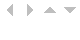

In [11]:
URL = 'https://republicghana.com/'
headers = {'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_10_1) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/39.0.2171.95 Safari/537.36'}
response = await asession.get(URL, headers=headers)
await response.html.arender(wait=2, timeout=100)
soup = BeautifulSoup(response.html.html, 'lxml')
print(soup.prettify())

In [12]:
tbl = soup.find('table', {'class': 'tablepress tablepress-id-2 dataTable no-footer'})
df = pd.read_html(str(tbl))[0].replace('-', np.nan)

df = df.rename(columns={
    'Buy': 'Exchange Rate Cash Buy', 
    'Sell': 'Exchange Rate Cash Sell',
    'Exchange Rates': 'Currency Code'
})
df['Date'] = pd.to_datetime('today').normalize()
df['Currency Code'] = df['Currency Code'].str.replace(')', '').str[-3:]
df['Currency'] = df['Currency Code'].apply(lambda x: currencies[x])
df['Exchange Rate Transfer_Buy'] = np.nan
df['Exchange Rate Transfer_Sell'] = np.nan
df['DateTime for Pull'] = dt.datetime.now()
df['Bank Name Link'] = 'https://republicghana.com/'
df['Bank Name'] = 'Republic Bank Ghana Limited'
df = df[['Date', 'Currency', 'Currency Code', 'Exchange Rate Transfer_Buy', 'Exchange Rate Transfer_Sell', 'Exchange Rate Cash Buy', 'Exchange Rate Cash Sell', 'DateTime for Pull', 'Bank Name Link', 'Bank Name']]

df.to_csv('ghana_forex.csv', mode='a', header=not os.path.exists('ghana_forex.csv'), index=False)
df

C:\Users\user\AppData\Local\Temp/ipykernel_11560/1628030989.py:10: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['Currency Code'] = df['Currency Code'].str.replace(')', '').str[-3:]


,Date,Currency,Currency Code,Exchange Rate Transfer_Buy,Exchange Rate Transfer_Sell,Exchange Rate Cash Buy,Exchange Rate Cash Sell,DateTime for Pull,Bank Name Link,Bank Name
0,2022-03-08,US Dollar,USD,NaN,NaN,6.55,6.995,2022-03-08 09:02:57.140284,https://republicghana.com/,Republic Bank Ghana Limited
1,2022-03-08,British Pound Sterling,GBP,NaN,NaN,8.75,9.570,2022-03-08 09:02:57.140284,https://republicghana.com/,Republic Bank Ghana Limited
2,2022-03-08,Euro,EUR,NaN,NaN,7.32,8.000,2022-03-08 09:02:57.140284,https://republicghana.com/,Republic Bank Ghana Limited


# 24) Stanbic Bank Ghana Limited

## Moved to PDF

In [13]:
# URL = 'https://www.stanbicbank.com.gh/gh/personal/about-us/news/daily-market-update'
# headers = {'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_10_1) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/39.0.2171.95 Safari/537.36'}
# response = await asession.get(URL, headers=headers)
# await response.html.arender(wait=2, timeout=100)
# soup = BeautifulSoup(response.html.html, 'lxml')
# print(soup.prettify())

In [14]:
# tbl = soup.find('table', {'border': '1'})
# df = pd.read_html(str(tbl))[0]
# df.columns = df.iloc[0, :]
# df = df.iloc[1:, :]

# df = df.rename(columns={
#     'Buying': 'Exchange Rate Cash Buy', 
#     'Selling': 'Exchange Rate Cash Sell',
#     'Currency Pair': 'Currency Code'
# })
# df['Date'] = pd.to_datetime('today').normalize()
# df['Currency Code'] = df['Currency Code'].str[:3]
# df['Currency'] = df['Currency Code'].apply(lambda x: currencies[x])
# df['DateTime for Pull'] = dt.datetime.now()
# df['Bank Name Link'] = 'https://www.stanbicbank.com.gh/gh/personal/about-us/news/daily-market-update'
# df['Bank Name'] = 'Stanbic Bank Ghana Limited'
# df = df[['Date', 'Currency', 'Currency Code', 'Exchange Rate Cash Buy', 'Exchange Rate Cash Sell', 'DateTime for Pull', 'Bank Name Link', 'Bank Name']]

# df.to_csv('ghana_forex.csv', mode='a', header=not os.path.exists('ghana_forex.csv'), index=False)
# df

# 23) Société Générale Ghana Limited

In [15]:
URL = 'https://societegenerale.com.gh/'
headers = {'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_10_1) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/39.0.2171.95 Safari/537.36'}
response = await asession.get(URL, headers=headers)
await response.html.arender(wait=2, timeout=100)
soup = BeautifulSoup(response.html.html, 'lxml')
print(soup.prettify())

<!DOCTYPE html>
<html class="cssremunit" lang="en">
 <head>
  <meta charset="utf-8"/>
  <base href="https://societegenerale.com.gh/"/>
  <meta content="user-scalable=no, user-scalable=no, initial-scale=1.0, maximum-scale=1, width=device-width" name="viewport"/>
  <meta content="telephone=no" name="format-detection"/>
  <link href="typo3conf/ext/bi_template/themes/default/res/css/styles.css?1641225410" media="all" rel="stylesheet" type="text/css"/>
  <link href="typo3conf/ext/ps_qwantsearch/Resources/Public/css/styles.css?1588676452" media="all" rel="stylesheet" type="text/css"/>
  <link href="typo3temp/themecolorcss/976-inline220308.css" media="all" rel="stylesheet" type="text/css"/>
  <title>
   Ghana  - Societe Generale Ghana
  </title>
  <meta content="Ghana" name="title"/>
  <!-- HrefLang&Canonic -->
  <link href="https://societegenerale.com.gh/en/" hreflang="x-default" rel="alternate"/>
  <link href="https://societegenerale.com.gh/en/" rel="canonical"/>
  <!-- SocialsMetas -->
  <

In [16]:
df = []
for l, p, s in zip(
    soup.find_all('div', {'class': 'label_col'}),
    soup.find_all('input', {'class': 'purchase_rate_input gcw_input3632784697'}),
    soup.find_all('input', {'class': 'sale_rate_input gcw_input3632784697'})
):
    df.append([l.text[:3], float(p['value']), float(s['value'])])
df = pd.DataFrame(df, columns=['Currency Code', 'Exchange Rate Cash Buy', 'Exchange Rate Cash Sell'])

df['Date'] = pd.to_datetime('today').normalize()
df['Currency Code'] = df['Currency Code'].str[:3]
df['Currency'] = df['Currency Code'].apply(lambda x: currencies[x])
df['Exchange Rate Transfer_Buy'] = np.nan
df['Exchange Rate Transfer_Sell'] = np.nan
df['DateTime for Pull'] = dt.datetime.now()
df['Bank Name Link'] = 'https://societegenerale.com.gh'
df['Bank Name'] = 'Société Générale Ghana Limited'
df = df[['Date', 'Currency', 'Currency Code', 'Exchange Rate Transfer_Buy', 'Exchange Rate Transfer_Sell', 'Exchange Rate Cash Buy', 'Exchange Rate Cash Sell', 'DateTime for Pull', 'Bank Name Link', 'Bank Name']]

df.to_csv('ghana_forex.csv', mode='a', header=not os.path.exists('ghana_forex.csv'), index=False)
df

,Date,Currency,Currency Code,Exchange Rate Transfer_Buy,Exchange Rate Transfer_Sell,Exchange Rate Cash Buy,Exchange Rate Cash Sell,DateTime for Pull,Bank Name Link,Bank Name
0,2022-03-08,US Dollar,USD,NaN,NaN,6.800000,7.050000,2022-03-08 09:03:05.947279,https://societegenerale.com.gh,Société Générale Ghana Limited
1,2022-03-08,Euro,EUR,NaN,NaN,7.486000,7.763000,2022-03-08 09:03:05.947279,https://societegenerale.com.gh,Société Générale Ghana Limited
2,2022-03-08,British Pound Sterling,GBP,NaN,NaN,9.051500,9.388000,2022-03-08 09:03:05.947279,https://societegenerale.com.gh,Société Générale Ghana Limited
3,2022-03-08,West African COF franc,XOF,NaN,NaN,0.011412,0.011835,2022-03-08 09:03:05.947279,https://societegenerale.com.gh,Société Générale Ghana Limited
4,2022-03-08,South African Rand,ZAR,NaN,NaN,0.444900,0.461300,2022-03-08 09:03:05.947279,https://societegenerale.com.gh,Société Générale Ghana Limited
5,2022-03-08,Swiss Franc,CHF,NaN,NaN,7.397500,7.673000,2022-03-08 09:03:05.947279,https://societegenerale.com.gh,Société Générale Ghana Limited
6,2022-03-08,Chinese Yuan Renminbi,CNH,NaN,NaN,1.076000,1.115600,2022-03-08 09:03:05.947279,https://societegenerale.com.gh,Société Générale Ghana Limited
7,2022-03-08,Japanese Yen,JPY,NaN,NaN,0.058900,0.061100,2022-03-08 09:03:05.947279,https://societegenerale.com.gh,Société Générale Ghana Limited


# 18) First National Bank Ghana

In [17]:
DRIVER_PATH = r'C:\Users\user\Desktop\chromedriver.exe'
options = Options()
options.headless = True
options.add_argument("--window-size=1920,1200")

driver = webdriver.Chrome(options=options, executable_path=ChromeDriverManager().install())
driver.get('https://www.firstnationalbank.com.gh/rates-pricing/foreignExchangeRates.html')
response = driver.page_source
driver.quit()

soup = BeautifulSoup(response, 'lxml')
print(soup.prettify())



====== WebDriver manager ======
Current google-chrome version is 98.0.4758
Get LATEST chromedriver version for 98.0.4758 google-chrome
Trying to download new driver from https://chromedriver.storage.googleapis.com/98.0.4758.102/chromedriver_win32.zip
Driver has been saved in cache [C:\Users\user\.wdm\drivers\chromedriver\win32\98.0.4758.102]
C:\Users\user\AppData\Local\Temp/ipykernel_11560/3820145966.py:6: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome(options=options, executable_path=ChromeDriverManager().install())


<html class="v2_2 minHeight" id="zaSkin">
 <head>
  <title>
   Foreign exchange rates - Rates - FNB
  </title>
  <meta content="IE=Edge" http-equiv="X-UA-Compatible"/>
  <meta content="width=device-width, initial-scale=1.0, maximum-scale=1.0, user-scalable=no" name="viewport"/>
  <meta content="true" name="HandheldFriendly"/>
  <link href="/00Assets/v2.2/css/font/font.css?v=1643620720000" media="all" onload="if(media!='all')media='all'" rel="stylesheet" type="text/css"/>
  <link href="/00Assets/v2.2/css/main_MM.css?v=1643620720000" rel="stylesheet" type="text/css"/>
  <link href="/00Assets/v2.2/js/libs/c3.min.css" rel="stylesheet" type="text/css"/>
  <link href="/00Assets/v2.2/css/libs/jquery-ui.min.css" rel="stylesheet" type="text/css"/>
  <link href="/00Assets/v2.2/skins/14/css/skin.css?v=1643620720000" rel="stylesheet" type="text/css"/>
  <script async="" src="//www.googletagmanager.com/gtm.js?id=GTM-W9XM52">
  </script>
  <script src="/00Assets/v2.2/js/Base64.js?v=1643620720000" ty

In [18]:
# tbl = soup.find('div', {'id': 'forexRatesTable'}).findChildren(recursive=False)[4]
# df = pd.read_html(str(tbl))[0]

# df = df.rename(columns={
#     'Bank Buying Notes': 'Exchange Rate Cash Buy', 
#     'Bank Selling Rate': 'Exchange Rate Cash Sell',
#     'Code': 'Currency Code',
#     'Bank Buying TT': 'Exchange Rate Transfer_Buy'
# }).drop(columns=['Description'])
# df['Date'] = pd.to_datetime('today').normalize()
# df['Currency Code'] = df['Currency Code'].str[:3]
# df['Currency'] = df['Currency Code'].apply(lambda x: currencies[x])
# df['Exchange Rate Transfer_Sell'] = np.nan
# df['DateTime for Pull'] = dt.datetime.now()
# df['Bank Name Link'] = 'https://www.firstnationalbank.com.gh/rates-pricing/foreignExchangeRates.html'
# df['Bank Name'] = 'First National Bank Ghana'
# df = df[['Date', 'Currency', 'Currency Code', 'Exchange Rate Transfer_Buy', 'Exchange Rate Transfer_Sell', 'Exchange Rate Cash Buy', 'Exchange Rate Cash Sell', 'DateTime for Pull', 'Bank Name Link', 'Bank Name']]

# df.to_csv('ghana_forex.csv', mode='a', header=not os.path.exists('ghana_forex.csv'), index=False)
# df

In [19]:
tbl = soup.find('div', {'id': 'forexRatesTable'}).findChildren(recursive=False)[6]
df_1 = pd.read_html(str(tbl))[0]

df_1 = df_1.rename(columns={
    'Bank Buying Notes': 'Exchange Rate Cash Buy', 
    'Bank Selling Rate': 'Exchange Rate Cash Sell',
    'Code': 'Currency Code',
    'Bank Buying TT': 'Exchange Rate Transfer_Buy'
}).drop(columns=['Description'])
df_1['Date'] = pd.to_datetime('today').normalize()
df_1['Currency Code'] = df_1['Currency Code'].str[:3]
df_1['Currency'] = df_1['Currency Code'].apply(lambda x: currencies[x])
df_1['Exchange Rate Transfer_Sell'] = np.nan
df_1['DateTime for Pull'] = dt.datetime.now()
df_1['Bank Name Link'] = 'https://www.firstnationalbank.com.gh/rates-pricing/foreignExchangeRates.html'
df_1['Bank Name'] = 'First National Bank Ghana'
df_1 = df_1[['Date', 'Currency', 'Currency Code', 'Exchange Rate Transfer_Buy', 'Exchange Rate Transfer_Sell', 'Exchange Rate Cash Buy', 'Exchange Rate Cash Sell', 'DateTime for Pull', 'Bank Name Link', 'Bank Name']]

df_1.to_csv('ghana_forex.csv', mode='a', header=not os.path.exists('ghana_forex.csv'), index=False)
df_1

,Date,Currency,Currency Code,Exchange Rate Transfer_Buy,Exchange Rate Transfer_Sell,Exchange Rate Cash Buy,Exchange Rate Cash Sell,DateTime for Pull,Bank Name Link,Bank Name
0,2022-03-08,Australian Dollar,AUD,5.099500,NaN,5.099500,5.210205,2022-03-08 09:03:30.659358,https://www.firstnationalbank.com.gh/rates-pri...,First National Bank Ghana
1,2022-03-08,Botswanan Pula,BWP,0.597100,NaN,0.597100,0.614185,2022-03-08 09:03:30.659358,https://www.firstnationalbank.com.gh/rates-pri...,First National Bank Ghana
2,2022-03-08,Canadian Dollar,CAD,5.330000,NaN,5.495000,5.580000,2022-03-08 09:03:30.659358,https://www.firstnationalbank.com.gh/rates-pri...,First National Bank Ghana
3,2022-03-08,Swiss Franc,CHF,7.559395,NaN,7.559395,7.724719,2022-03-08 09:03:30.659358,https://www.firstnationalbank.com.gh/rates-pri...,First National Bank Ghana
4,2022-03-08,Chinese Yuan,CNY,1.108472,NaN,1.108472,1.132261,2022-03-08 09:03:30.659358,https://www.firstnationalbank.com.gh/rates-pri...,First National Bank Ghana
5,2022-03-08,Danish Krone,DKK,1.025671,NaN,1.025671,1.047803,2022-03-08 09:03:30.659358,https://www.firstnationalbank.com.gh/rates-pri...,First National Bank Ghana
6,2022-03-08,Hong Kong Dollar,HKD,0.472187,NaN,0.472187,0.527384,2022-03-08 09:03:30.659358,https://www.firstnationalbank.com.gh/rates-pri...,First National Bank Ghana
7,2022-03-08,Indian Rupee,INR,0.091054,NaN,0.091054,0.093017,2022-03-08 09:03:30.659358,https://www.firstnationalbank.com.gh/rates-pri...,First National Bank Ghana
8,2022-03-08,Japanese Yen,JPY,0.060638,NaN,0.060638,0.061942,2022-03-08 09:03:30.659358,https://www.firstnationalbank.com.gh/rates-pri...,First National Bank Ghana
9,2022-03-08,Kenyan Shilling,KES,0.061350,NaN,0.061350,0.062747,2022-03-08 09:03:30.659358,https://www.firstnationalbank.com.gh/rates-pri...,First National Bank Ghana


# 16) Consolidated Bank Ghana

In [20]:
DRIVER_PATH = r'C:\Users\user\Desktop\chromedriver.exe'
options = Options()
options.headless = True
options.add_argument("--window-size=1920,1200")

driver = webdriver.Chrome(options=options, executable_path=ChromeDriverManager().install())
driver.get("https://cbg.com.gh/rates.html")
time.sleep(5)
response = driver.page_source
driver.quit()

soup = BeautifulSoup(response, 'lxml')
print(soup.prettify())



====== WebDriver manager ======
Current google-chrome version is 98.0.4758
Get LATEST chromedriver version for 98.0.4758 google-chrome
Trying to download new driver from https://chromedriver.storage.googleapis.com/98.0.4758.102/chromedriver_win32.zip
Driver has been saved in cache [C:\Users\user\.wdm\drivers\chromedriver\win32\98.0.4758.102]
C:\Users\user\AppData\Local\Temp/ipykernel_11560/4066486111.py:6: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome(options=options, executable_path=ChromeDriverManager().install())


<html class="nojs html" lang="en-US">
 <head>
  <script type="text/javascript">
   if(typeof Muse == "undefined") window.Muse = {}; window.Muse.assets = {"required":["jquery-1.8.3.min.js", "museutils.js", "jquery.watch.js", "webpro.js", "musewpslideshow.js", "jquery.museoverlay.js", "touchswipe.js", "jquery.musepolyfill.bgsize.js", "jquery.scrolleffects.js", "internet-banking.css"], "outOfDate":[]};
  </script>
  <meta content="text/html;charset=utf-8" http-equiv="Content-type"/>
  <meta content="utf-8" http-equiv="encoding"/>
  <meta content="IE=edge" http-equiv="X-UA-Compatible"/>
  <meta content="width=device-width, initial-scale=1.0" name="viewport"/>
  <meta content="sovereign bank limited, ghana sovereign bank, sovereign bank ghana, sovereign ghana bank, sovereign banking, product services, product and services, financial services, global trade management, rates, exchange rate, exchange, rate exchange, hall bank, hall banking, bank hall, banking hall, e-banking, forms, full-servi

In [21]:
tbl = soup.find('div', {'id': 'response'}).find('table')
df = pd.read_html(str(tbl))[0].replace('-', np.nan)

df = df.rename(columns={
    'Cash': 'Exchange Rate Cash Buy', 
    'Unnamed: 2': 'Exchange Rate Cash Sell',
    'Daily Exchange rate': 'Currency Code',
    'Cross Rates': 'Currency Code',
    'Transfer': 'Exchange Rate Transfer_Buy',
    'Unnamed: 4': 'Exchange Rate Transfer_Sell'
})
df = df.iloc[1:, :]
df['Date'] = pd.to_datetime('today').normalize()
df['Currency Code'] = df['Currency Code'].str[:3]
df['Currency'] = df['Currency Code'].apply(lambda x: currencies[x])
df['DateTime for Pull'] = dt.datetime.now()
df['Bank Name Link'] = 'https://cbg.com.gh/rates.html'
df['Bank Name'] = 'Consolidated Bank Ghana'
df = df[['Date', 'Currency', 'Currency Code', 'Exchange Rate Transfer_Buy', 'Exchange Rate Transfer_Sell', 'Exchange Rate Cash Buy', 'Exchange Rate Cash Sell', 'DateTime for Pull', 'Bank Name Link', 'Bank Name']]

df.to_csv('ghana_forex.csv', mode='a', header=not os.path.exists('ghana_forex.csv'), index=False)
df

,Date,Currency,Currency Code,Exchange Rate Transfer_Buy,Exchange Rate Transfer_Sell,Exchange Rate Cash Buy,Exchange Rate Cash Sell,DateTime for Pull,Bank Name Link,Bank Name
1,2022-03-08,US Dollar,USD,6.9500,7.2500,6.9700,7.2700,2022-03-08 09:03:47.082479,https://cbg.com.gh/rates.html,Consolidated Bank Ghana
2,2022-03-08,British Pound Sterling,GBP,9.2519,9.7063,9.2719,9.7263,2022-03-08 09:03:47.082479,https://cbg.com.gh/rates.html,Consolidated Bank Ghana
3,2022-03-08,Euro,EUR,7.6582,8.0439,7.6782,8.0639,2022-03-08 09:03:47.082479,https://cbg.com.gh/rates.html,Consolidated Bank Ghana
4,2022-03-08,Canadian Dollar,CAD,5.5150,5.7512,NaN,NaN,2022-03-08 09:03:47.082479,https://cbg.com.gh/rates.html,Consolidated Bank Ghana
5,2022-03-08,West African CFA franc,CFA,0.0117,0.0123,NaN,NaN,2022-03-08 09:03:47.082479,https://cbg.com.gh/rates.html,Consolidated Bank Ghana
6,2022-03-08,South African Rand,ZAR,0.4539,0.4739,NaN,NaN,2022-03-08 09:03:47.082479,https://cbg.com.gh/rates.html,Consolidated Bank Ghana
7,2022-03-08,Chinese Yuan,CNY,1.0997,1.1471,NaN,NaN,2022-03-08 09:03:47.082479,https://cbg.com.gh/rates.html,Consolidated Bank Ghana


# 15) CalBank Limited

In [22]:
URL = 'https://calbank.net/'
headers = {'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_10_1) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/39.0.2171.95 Safari/537.36'}
response = await asession.get(URL, headers=headers)
await response.html.arender(wait=2, timeout=100)
soup = BeautifulSoup(response.html.html, 'lxml')
print(soup.prettify())

<!DOCTYPE html>
<html lang="en-US">
 <head>
  <meta charset="utf-8"/>
  <meta content="width=device-width, initial-scale=1" name="viewport"/>
  <link href="http://gmpg.org/xfn/11" rel="profile"/>
  <title>
   CalBank – Forward Together
  </title>
  <meta content="max-image-preview:large" name="robots"/>
  <link href="//s.w.org" rel="dns-prefetch"/>
  <link href="https://calbank.net/feed/" rel="alternate" title="CalBank » Feed" type="application/rss+xml"/>
  <script async="" crossorigin="anonymous" integrity="sha384-0ekdM7lV68sbOr8s62kW4bKzV9c9AvM3TResBrO9+nRRWySSYhcWJaLDjqUe69Or" src="https://www.gstatic.com/recaptcha/releases/_exWVY_hlNJJl2Abm8pI9i1L/recaptcha__en.js" type="text/javascript">
  </script>
  <script async="" src="https://www.google-analytics.com/analytics.js" type="text/javascript">
  </script>
  <script async="" src="https://www.googletagmanager.com/gtag/js?id=G-WDZLX8WS2K&amp;l=dataLayer&amp;cx=c" type="text/javascript">
  </script>
  <script async="" src="https://conn

In [23]:
try:
    df = []
    for i in soup.find('div', {'class': 'dce-acf-repeater'}).find_all('div', {'class': 'elementor-row'}):
        df.append(i.text.strip().replace('           ', ',').replace('\n', '').split(','))
    df = pd.DataFrame(df, columns=['Currency Code', 'Exchange Rate Cash Buy', 'Exchange Rate Cash Sell'])
except:
    df = []
    for i in soup.find('div', {'class': 'dce-acf-repeater'}).find_all('div', {'class': 'elementor-row'}):
        df.append(i.text.strip().replace('           ', ',').replace('\n', '').split(' '))
    df = pd.DataFrame(df, columns=['Currency Code', 'Exchange Rate Cash Buy', 'Exchange Rate Cash Sell'])

df['Date'] = pd.to_datetime('today').normalize()
df['Currency Code'] = df['Currency Code'].str[:3]
df['Currency'] = df['Currency Code'].apply(lambda x: currencies[x])
df['Exchange Rate Transfer_Buy'] = np.nan
df['Exchange Rate Transfer_Sell'] = np.nan
df['DateTime for Pull'] = dt.datetime.now()
df['Bank Name Link'] = 'https://calbank.net/'
df['Bank Name'] = 'CalBank Limited'
df = df[['Date', 'Currency', 'Currency Code', 'Exchange Rate Transfer_Buy', 'Exchange Rate Transfer_Sell', 'Exchange Rate Cash Buy', 'Exchange Rate Cash Sell', 'DateTime for Pull', 'Bank Name Link', 'Bank Name']]

df.to_csv('ghana_forex.csv', mode='a', header=not os.path.exists('ghana_forex.csv'), index=False)
df

,Date,Currency,Currency Code,Exchange Rate Transfer_Buy,Exchange Rate Transfer_Sell,Exchange Rate Cash Buy,Exchange Rate Cash Sell,DateTime for Pull,Bank Name Link,Bank Name
0,2022-03-08,US Dollar,USD,NaN,NaN,6.9500,7.5600,2022-03-08 09:04:21.462151,https://calbank.net/,CalBank Limited
1,2022-03-08,Euro,EUR,NaN,NaN,7.6000,8.2100,2022-03-08 09:04:21.462151,https://calbank.net/,CalBank Limited
2,2022-03-08,British Pound Sterling,GBP,NaN,NaN,9.2000,9.8100,2022-03-08 09:04:21.462151,https://calbank.net/,CalBank Limited


# 26) Bank of Ghana

## Unscrapable

In [24]:
# URL = 'https://www.bog.gov.gh/treasury-and-the-markets/historical-interbank-fx-rates/'
# headers = {'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_10_1) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/39.0.2171.95 Safari/537.36'}
# response = await asession.get(URL, headers=headers, verify=False)
# await response.html.arender(wait=2, timeout=100)
# soup = BeautifulSoup(response.html.html, 'lxml')
# print(soup.prettify())

In [25]:
# from selenium import webdriver
# from selenium.webdriver.chrome.options import Options
# from selenium.webdriver.common.by import By
# from selenium.webdriver.support.ui import WebDriverWait
# from selenium.webdriver.support import expected_conditions as EC

# DRIVER_PATH = r'C:\Users\user\Desktop\chromedriver.exe'
# options = Options()
# # options.headless = True
# # options.add_argument("--window-size=1920,1200")

# driver = webdriver.Chrome(options=options, executable_path=ChromeDriverManager().install())
# driver.get("https://www.bog.gov.gh/treasury-and-the-markets/historical-interbank-fx-rates/")
# WebDriverWait(driver, 20).until(EC.visibility_of_element_located((By.CLASS_NAME, "responsiveExpander")))
# response = driver.page_source
# driver.quit()

# soup = BeautifulSoup(response, 'lxml')
# print(soup.prettify())

# 14) Agricultural Development Bank

In [26]:
URL = 'https://www.agricbank.com/'
headers = {'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_10_1) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/39.0.2171.95 Safari/537.36'}
response = await asession.get(URL, headers=headers)
await response.html.arender(wait=2, timeout=100)
soup = BeautifulSoup(response.html.html, 'lxml')
print(soup.prettify())

<!DOCTYPE html>
<html data-cookies-popup="true" lang="en">
 <head>
  <!-- Meta -->
  <meta content="text/html; charset=utf-8" http-equiv="Content-Type"/>
  <meta content="width=device-width, initial-scale=1" name="viewport"/>
  <!-- Title -->
  <title>
   Agricultural Development Bank
  </title>
  <!-- Favicons -->
  <link href="https://www.agricbank.com/wp-content/themes/agricbank/assets/img/favicon.png" rel="shortcut icon"/>
  <link href="https://www.agricbank.com/wp-content/themes/agricbank/assets/img/favicon_60x60.png" rel="apple-touch-icon"/>
  <link href="https://www.agricbank.com/wp-content/themes/agricbank/assets/img/favicon_76x76.png" rel="apple-touch-icon" sizes="76x76"/>
  <link href="https://www.agricbank.com/wp-content/themes/agricbank/assets/img/favicon_120x120.png" rel="apple-touch-icon" sizes="120x120"/>
  <link href="https://www.agricbank.com/wp-content/themes/agricbank/assets/img/favicon_152x152.png" rel="apple-touch-icon" sizes="152x152"/>
  <!-- Google Web Fonts -->

In [27]:
tbl = soup.find('table', {'class': 'full'})
df = pd.read_html(str(tbl))[0]
df.columns = df.columns.droplevel(0)
df = df.drop('Currency', axis=1)
df.columns = ['Currency Code', 'Exchange Rate Transfer_Buy', 'Exchange Rate Transfer_Sell', 'Exchange Rate Cash Buy', 'Exchange Rate Cash Sell']

df['Date'] = pd.to_datetime('today').normalize()
df['Currency Code'] = df['Currency Code'].str[:3]
df['Currency'] = df['Currency Code'].apply(lambda x: currencies[x])
df['DateTime for Pull'] = dt.datetime.now()
df['Bank Name Link'] = 'https://www.agricbank.com/'
df['Bank Name'] = 'Agricultural Development Bank'
df = df[['Date', 'Currency', 'Currency Code', 'Exchange Rate Transfer_Buy', 'Exchange Rate Transfer_Sell', 'Exchange Rate Cash Buy', 'Exchange Rate Cash Sell', 'DateTime for Pull', 'Bank Name Link', 'Bank Name']]

df.to_csv('ghana_forex.csv', mode='a', header=not os.path.exists('ghana_forex.csv'), index=False)
df

,Date,Currency,Currency Code,Exchange Rate Transfer_Buy,Exchange Rate Transfer_Sell,Exchange Rate Cash Buy,Exchange Rate Cash Sell,DateTime for Pull,Bank Name Link,Bank Name
0,2022-03-08,US Dollar,USD,6.9,7.35,6.91,7.42,2022-03-08 09:04:28.822615,https://www.agricbank.com/,Agricultural Development Bank
1,2022-03-08,British Pound Sterling,GBP,8.8,9.85,8.80,9.90,2022-03-08 09:04:28.822615,https://www.agricbank.com/,Agricultural Development Bank
2,2022-03-08,Euro,EUR,7.3,8.13,7.30,8.18,2022-03-08 09:04:28.822615,https://www.agricbank.com/,Agricultural Development Bank


# 19) Ghana Commercial Bank

In [28]:
time.sleep(10)
for _ in range(2):
    URL = 'https://www.gcbbank.com.gh/87-exchange/447-foreign-exchange'
    headers = {'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_10_1) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/39.0.2171.95 Safari/537.36'}
    response = await asession.get(URL, headers=headers)
    await response.html.arender(wait=2, timeout=100)
    soup = BeautifulSoup(response.html.html, 'lxml')
    print(soup.prettify())

<!DOCTYPE html>
<html class="com_content view-article itemid-101 home j31 mm-hover no-touch" dir="ltr" lang="en-gb">
 <head>
  <!-- Global site tag (gtag.js) - Google Analytics -->
  <script async="" src="https://connect.facebook.net/signals/config/1134674663570307?v=2.9.55&amp;r=stable">
  </script>
  <script async="" src="https://connect.facebook.net/en_US/fbevents.js">
  </script>
  <script async="" src="https://www.google-analytics.com/analytics.js" type="text/javascript">
  </script>
  <script async="" src="https://www.googletagmanager.com/gtag/js?id=UA-54768525-1">
  </script>
  <script>
   window.dataLayer = window.dataLayer || [];
  function gtag(){dataLayer.push(arguments);}
  gtag('js', new Date());

  gtag('config', 'UA-54768525-1');
  </script>
  <meta content="IH0LSy0zy2sQgGhkMkeKoWEXP-zFMhov0eUzVuZp4NI" name="google-site-verification"/>
  <base href="https://www.gcbbank.com.gh/87-exchange/447-foreign-exchange"/>
  <meta content="text/html; charset=utf-8" http-equiv="conte

<!DOCTYPE html>
<html class="com_content view-article itemid-101 home j31 mm-hover no-touch" dir="ltr" lang="en-gb">
 <head>
  <!-- Global site tag (gtag.js) - Google Analytics -->
  <script async="" src="https://connect.facebook.net/signals/config/1134674663570307?v=2.9.55&amp;r=stable">
  </script>
  <script async="" src="https://connect.facebook.net/en_US/fbevents.js">
  </script>
  <script async="" src="https://www.google-analytics.com/analytics.js" type="text/javascript">
  </script>
  <script async="" src="https://www.googletagmanager.com/gtag/js?id=UA-54768525-1">
  </script>
  <script>
   window.dataLayer = window.dataLayer || [];
  function gtag(){dataLayer.push(arguments);}
  gtag('js', new Date());

  gtag('config', 'UA-54768525-1');
  </script>
  <meta content="IH0LSy0zy2sQgGhkMkeKoWEXP-zFMhov0eUzVuZp4NI" name="google-site-verification"/>
  <base href="https://www.gcbbank.com.gh/87-exchange/447-foreign-exchange"/>
  <meta content="text/html; charset=utf-8" http-equiv="conte

In [29]:
tbl = soup.find('table', {'class': 'table__subRows'})
df = pd.read_html(str(tbl))[0]
df.columns = df.iloc[0, :]
df = df.iloc[1:, :]

df = df.rename(columns={
    'Buying': 'Exchange Rate Cash Buy', 
    'Selling': 'Exchange Rate Cash Sell',
    'Currency': 'Currency Code'
})
df['Date'] = pd.to_datetime('today').normalize()
df['Currency'] = df['Currency Code'].apply(lambda x: currencies[x])
df['Exchange Rate Transfer_Buy'] = np.nan
df['Exchange Rate Transfer_Sell'] = np.nan
df['DateTime for Pull'] = dt.datetime.now()
df['Bank Name Link'] = 'https://www.gcbbank.com.gh/87-exchange/447-foreign-exchange'
df['Bank Name'] = 'Ghana Commercial Bank'
df = df[['Date', 'Currency', 'Currency Code', 'Exchange Rate Transfer_Buy', 'Exchange Rate Transfer_Sell', 'Exchange Rate Cash Buy', 'Exchange Rate Cash Sell', 'DateTime for Pull', 'Bank Name Link', 'Bank Name']]

df.to_csv('ghana_forex.csv', mode='a', header=not os.path.exists('ghana_forex.csv'), index=False)
df

,Date,Currency,Currency Code,Exchange Rate Transfer_Buy,Exchange Rate Transfer_Sell,Exchange Rate Cash Buy,Exchange Rate Cash Sell,DateTime for Pull,Bank Name Link,Bank Name
1,2022-03-08,US Dollar,USD,NaN,NaN,6.8500,7.2600,2022-03-08 09:04:47.603487,https://www.gcbbank.com.gh/87-exchange/447-for...,Ghana Commercial Bank
2,2022-03-08,British Pound Sterling,GBP,NaN,NaN,9.2300,9.8200,2022-03-08 09:04:47.603487,https://www.gcbbank.com.gh/87-exchange/447-for...,Ghana Commercial Bank
3,2022-03-08,Euro,EUR,NaN,NaN,7.6200,8.1500,2022-03-08 09:04:47.603487,https://www.gcbbank.com.gh/87-exchange/447-for...,Ghana Commercial Bank
4,2022-03-08,Canadian Dollar,CAD,NaN,NaN,5.4200,5.9300,2022-03-08 09:04:47.603487,https://www.gcbbank.com.gh/87-exchange/447-for...,Ghana Commercial Bank
5,2022-03-08,Japanese Yen,YEN,NaN,NaN,0.0580,0.0635,2022-03-08 09:04:47.603487,https://www.gcbbank.com.gh/87-exchange/447-for...,Ghana Commercial Bank


# 20) National Investment Bank Limited

In [30]:
time.sleep(10)
DRIVER_PATH = r'C:\Users\user\Desktop\chromedriver.exe'
options = Options()
options.headless = True
options.add_argument("--window-size=1920,1200")

driver = webdriver.Chrome(options=options, executable_path=ChromeDriverManager().install())
driver.get('https://www.nib-ghana.com/foreign-exchange/')
time.sleep(5)
response = driver.page_source
driver.quit()

soup = BeautifulSoup(response, 'lxml')
print(soup.prettify())



====== WebDriver manager ======
Current google-chrome version is 98.0.4758
Get LATEST chromedriver version for 98.0.4758 google-chrome
Trying to download new driver from https://chromedriver.storage.googleapis.com/98.0.4758.102/chromedriver_win32.zip
Driver has been saved in cache [C:\Users\user\.wdm\drivers\chromedriver\win32\98.0.4758.102]
C:\Users\user\AppData\Local\Temp/ipykernel_11560/2035951984.py:7: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome(options=options, executable_path=ChromeDriverManager().install())


<html class="no-js js_active vc_desktop vc_transform vc_transform wf-roboto-n3-active wf-roboto-n1-active wf-roboto-n5-active wf-roboto-n4-active wf-roboto-n7-active wf-heebo-n2-active wf-heebo-n4-active wf-heebo-n9-active wf-heebo-n3-active wf-heebo-n1-active wf-heebo-n5-active wf-heebo-n6-active wf-heebo-n8-active wf-heebo-n7-active wf-roboto-i9-active wf-roboto-i1-active wf-roboto-i4-active wf-roboto-i3-active wf-roboto-n9-active wf-roboto-i5-active wf-roboto-i7-active wf-active" lang="en-US">
 <head>
  <!-- META TAGS -->
  <meta charset="utf-8"/>
  <meta content="width=device-width, initial-scale=1, maximum-scale=8" name="viewport"/>
  <!-- LINK TAGS -->
  <title>
   Foreign Exchange – NIB
  </title>
  <script async="" src="https://www.google-analytics.com/plugins/ua/linkid.js" type="text/javascript">
  </script>
  <script async="" charset="UTF-8" crossorigin="*" src="https://embed.tawk.to/60014f7ba9a34e36b96cacfc/1es2hsv9p">
  </script>
  <script async="" src="https://www.google-a

In [31]:
tbl = soup.find('table', {'data-ninja_table_instance': 'ninja_table_instance_0'})
df = pd.read_html(str(tbl))[0].iloc[:-1, :]
df.columns = df.columns.droplevel(0)
df_t = df[df['CASH'] == 'NO'].rename(columns={
    'BUYING': 'Exchange Rate Transfer_Buy', 
    'SELLING': 'Exchange Rate Transfer_Sell'
}).drop(columns=['CASH', 'TRANSFER/REMITTANCES'])

df_c = df[df['CASH'] == 'YES'].rename(columns={
    'BUYING': 'Exchange Rate Cash Buy', 
    'SELLING': 'Exchange Rate Cash Sell'
}).drop(columns=['CASH', 'TRANSFER/REMITTANCES'])
df = df_t.merge(df_c, on='CURRENCY TO CEDI', how='outer').drop(columns=['Date_x', 'Date_y']).rename({'Date_y': 'Date'}).replace({'EURO': 'Euro', 'USD': 'US Dollar', 'GBP': 'British Pound Sterling'})
df['CURRENCY TO CEDI'] = df['CURRENCY TO CEDI'].apply(lambda x: {v: k for k, v in currencies.items()}[x])
df = df.rename(columns={'CURRENCY TO CEDI': 'Currency Code'})

df['Date'] = pd.to_datetime('today').normalize()
df['Currency'] = df['Currency Code'].apply(lambda x: currencies[x])
df['DateTime for Pull'] = dt.datetime.now()
df['Bank Name Link'] = 'https://www.nib-ghana.com/foreign-exchange/'
df['Bank Name'] = 'National Investment Bank Limited'
df = df[['Date', 'Currency', 'Currency Code', 'Exchange Rate Transfer_Buy', 'Exchange Rate Transfer_Sell', 'Exchange Rate Cash Buy', 'Exchange Rate Cash Sell', 'DateTime for Pull', 'Bank Name Link', 'Bank Name']]

df.to_csv('ghana_forex.csv', mode='a', header=not os.path.exists('ghana_forex.csv'), index=False)
df

,Date,Currency,Currency Code,Exchange Rate Transfer_Buy,Exchange Rate Transfer_Sell,Exchange Rate Cash Buy,Exchange Rate Cash Sell,DateTime for Pull,Bank Name Link,Bank Name
0,2022-03-08,US Dollar,USD,6.6500,7.2700,6.6500,7.2900,2022-03-08 09:05:15.734591,https://www.nib-ghana.com/foreign-exchange/,National Investment Bank Limited
1,2022-03-08,British Pound Sterling,GBP,8.5700,9.6500,8.5700,9.6700,2022-03-08 09:05:15.734591,https://www.nib-ghana.com/foreign-exchange/,National Investment Bank Limited
2,2022-03-08,Euro,EUR,7.4000,8.1000,7.4000,8.1200,2022-03-08 09:05:15.734591,https://www.nib-ghana.com/foreign-exchange/,National Investment Bank Limited
3,2022-03-08,Canadian Dollar,CAD,5.1925,5.6765,NaN,NaN,2022-03-08 09:05:15.734591,https://www.nib-ghana.com/foreign-exchange/,National Investment Bank Limited
4,2022-03-08,Swiss Franc,CHF,7.1885,7.8585,NaN,NaN,2022-03-08 09:05:15.734591,https://www.nib-ghana.com/foreign-exchange/,National Investment Bank Limited
5,2022-03-08,Japanese Yen,JPY,0.0575,0.0630,NaN,NaN,2022-03-08 09:05:15.734591,https://www.nib-ghana.com/foreign-exchange/,National Investment Bank Limited
6,2022-03-08,South African Rand,ZAR,0.4345,0.4750,NaN,NaN,2022-03-08 09:05:15.734591,https://www.nib-ghana.com/foreign-exchange/,National Investment Bank Limited
7,2022-03-08,Australian Dollar,AUD,4.8510,5.3035,NaN,NaN,2022-03-08 09:05:15.734591,https://www.nib-ghana.com/foreign-exchange/,National Investment Bank Limited
8,2022-03-08,Danish Krone,DKK,0.9755,1.0660,NaN,NaN,2022-03-08 09:05:15.734591,https://www.nib-ghana.com/foreign-exchange/,National Investment Bank Limited
9,2022-03-08,Norwegian Krone,NOK,0.7390,0.8080,NaN,NaN,2022-03-08 09:05:15.734591,https://www.nib-ghana.com/foreign-exchange/,National Investment Bank Limited


# 25 Standard Chartered Bank Ghana Limited

In [32]:
URL = 'https://www.african-markets.com/en/stock-markets/gse/listed-companies/company?code=SCB'
headers = {'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_10_1) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/39.0.2171.95 Safari/537.36'}
response = await asession.get(URL, headers=headers)
await response.html.arender(wait=2, timeout=100)
soup = BeautifulSoup(response.html.html, 'lxml')
print(soup.prettify())

<!DOCTYPE html>
<html dir="ltr" lang="en-gb" slick-uniqueid="3" xml:lang="en-gb" xmlns="http://www.w3.org/1999/xhtml">
 <head>
  <meta content="IE=edge" http-equiv="X-UA-Compatible"/>
  <meta content="width=device-width, initial-scale=1.0" name="viewport"/>
  <meta charset="utf-8"/>
  <base href="https://www.african-markets.com/en/stock-markets/gse/listed-companies/company"/>
  <meta content="markets, africa, bourse, ghana, kenya, uganda, ouganda malawi, rwanda, nigeria, tanzania, tanzanie, botswana, zimbabwe, mozambique, maurice, mauritius, egypte, egypt, tunisia, tunisie, morocco, maroc, shares, equities, african, south africa, afrique du sud, data, news, actualité, sens, provider, exchange, analysis, companies, company, platform, price, performance, trade, insight, stock, market" name="keywords"/>
  <meta content="ISIN : GH0000000185 | Standard Chartered Ghana is a banking and financial services company in Ghana. It has been in operation since 1896, when it was known as the Bank of 

In [33]:
tbl = soup.find('table', {'class': 'tabtable-rs_7f98zx7q'})
df = pd.read_html(str(tbl))[0]
df = df.drop([0, 2, 4], axis=1)
df = df.rename(columns={
    1: 'Currency Code', 
    3: 'Exchange Rate Cash Buy'
})
df['Date'] = pd.to_datetime('today').normalize()
df['Exchange Rate Cash Buy'] = (df['Exchange Rate Cash Buy'].str[:4]).astype(float)
df['Currency Code'] = df['Currency Code'].str[2:]
df['Currency'] = df['Currency Code'].apply(lambda x: currencies[x])
df['Exchange Rate Cash Sell'] = np.nan
df['Exchange Rate Transfer_Buy'] = np.nan
df['Exchange Rate Transfer_Sell'] = np.nan
df['DateTime for Pull'] = dt.datetime.now()
df['Bank Name Link'] = 'https://www.african-markets.com/en/stock-markets/gse/listed-companies/company?code=SCB'
df['Bank Name'] = 'Standard Chartered Bank Ghana Limited'
df = df[['Date', 'Currency', 'Currency Code', 'Exchange Rate Transfer_Buy', 'Exchange Rate Transfer_Sell', 'Exchange Rate Cash Buy', 'Exchange Rate Cash Sell', 'DateTime for Pull', 'Bank Name Link', 'Bank Name']]

df.to_csv('ghana_forex.csv', mode='a', header=not os.path.exists('ghana_forex.csv'), index=False)
df

,Date,Currency,Currency Code,Exchange Rate Transfer_Buy,Exchange Rate Transfer_Sell,Exchange Rate Cash Buy,Exchange Rate Cash Sell,DateTime for Pull,Bank Name Link,Bank Name
0,2022-03-08,Euro,EUR,NaN,NaN,7.69,NaN,2022-03-08 09:05:26.520727,https://www.african-markets.com/en/stock-marke...,Standard Chartered Bank Ghana Limited
1,2022-03-08,US Dollar,USD,NaN,NaN,7.06,NaN,2022-03-08 09:05:26.520727,https://www.african-markets.com/en/stock-marke...,Standard Chartered Bank Ghana Limited
